<a href="https://colab.research.google.com/github/phoebewang59/TSDP/blob/main/TDSP_Phoebe_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

This research examines the [NYC OpenData Motor Vehicle Collisions - Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). It contains detailed information on all police-reported motor vehicle collisions in New York City. The study aims to identify patterns and variations in contributing factors of crashes (e.g., backing up unsafely, unsafe lane changing, etc.) across different times and levels of crash severity.


---
## **Research Question**

What are the contributing factors to crashes, and how do they vary across time and crash severity?

To explore this question, the study addresses the following sub-questions:

1. What are the most common contributing factors to crashes?
2. How do factors like driver inattention/distraction vary by time of day and week?
3. How do the top contributing factors relate to crash severity?


---
## **Data Exploration**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Read the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes.csv")

<ipython-input-11-d8f9a1ac3e13>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes.csv")


### **Preview the First 5 Rows of Data**

In [12]:
data.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


### **Summary Statistics**

In [15]:
desc_stats = data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.911572e+06,1.911572e+06,2.151150e+06,2.151137e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06
mean,4.061878e+01,-7.373590e+01,3.199614e-01,1.544300e-03,5.823813e-02,7.656306e-04,2.796667e-02,1.199348e-04,2.295232e-01,6.303552e-04,3.215618e+06
std,2.068666e+00,3.873375e+00,7.083777e-01,4.146681e-02,2.474319e-01,2.822509e-02,1.670092e-01,1.099319e-02,6.695449e-01,2.746892e-02,1.507193e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066752e+01,-7.397469e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.173912e+06
50%,4.072052e+01,-7.392705e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.711852e+06
75%,4.076961e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.249873e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.787900e+06


### **Check for Missing Values**

In [16]:
missing_values = data.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(data)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2141837,99.566236
CONTRIBUTING FACTOR VEHICLE 5,2141540,99.552429
VEHICLE TYPE CODE 4,2117169,98.419510
CONTRIBUTING FACTOR VEHICLE 4,2115904,98.360705
VEHICLE TYPE CODE 3,2002017,93.066511
CONTRIBUTING FACTOR VEHICLE 3,1996155,92.794008
OFF STREET NAME,1781236,82.803203
CROSS STREET NAME,820302,38.132865
ZIP CODE,666730,30.993860
BOROUGH,666464,30.981495


---
## **Analysis**

### **Top 10 Contributing Factors to Crashes**

<ipython-input-17-4aa0ec52a118>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_factors.index, y=top_factors.values, palette="colorblind")


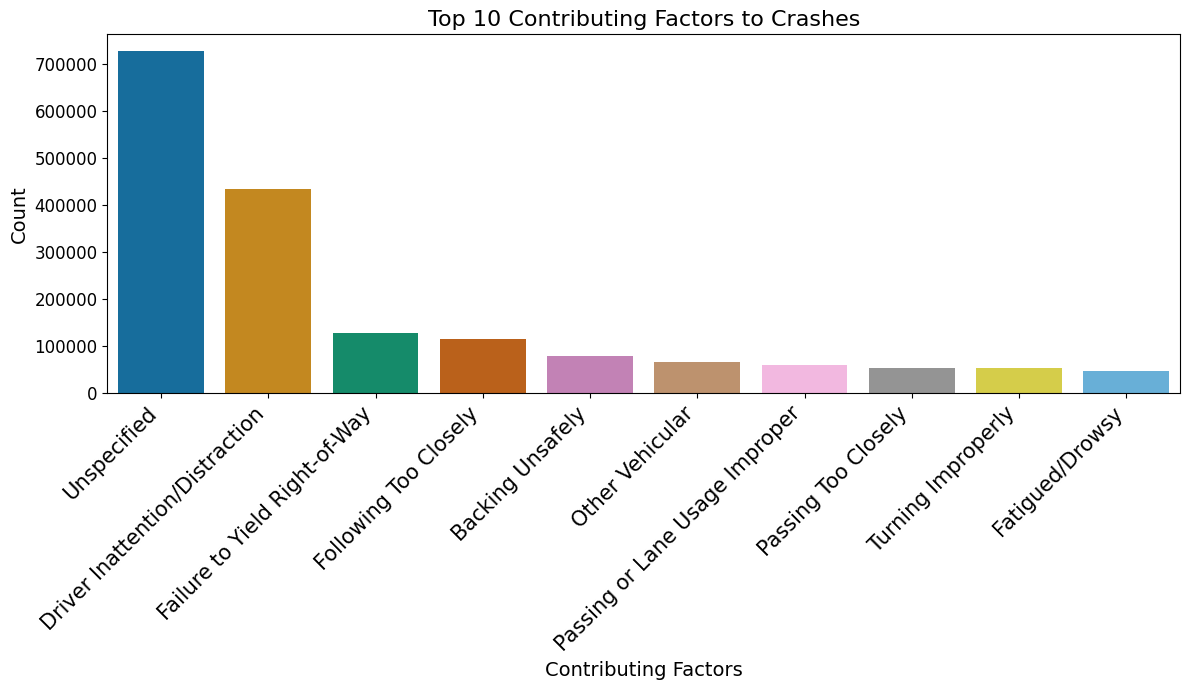

In [17]:
top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x= top_factors.index, y=top_factors.values, palette="colorblind")
plt.title('Top 10 Contributing Factors to Crashes', fontsize=16)
plt.xlabel('Contributing Factors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### **Time Series Analysis: Inattentive Driving Patterns by Time and Day**


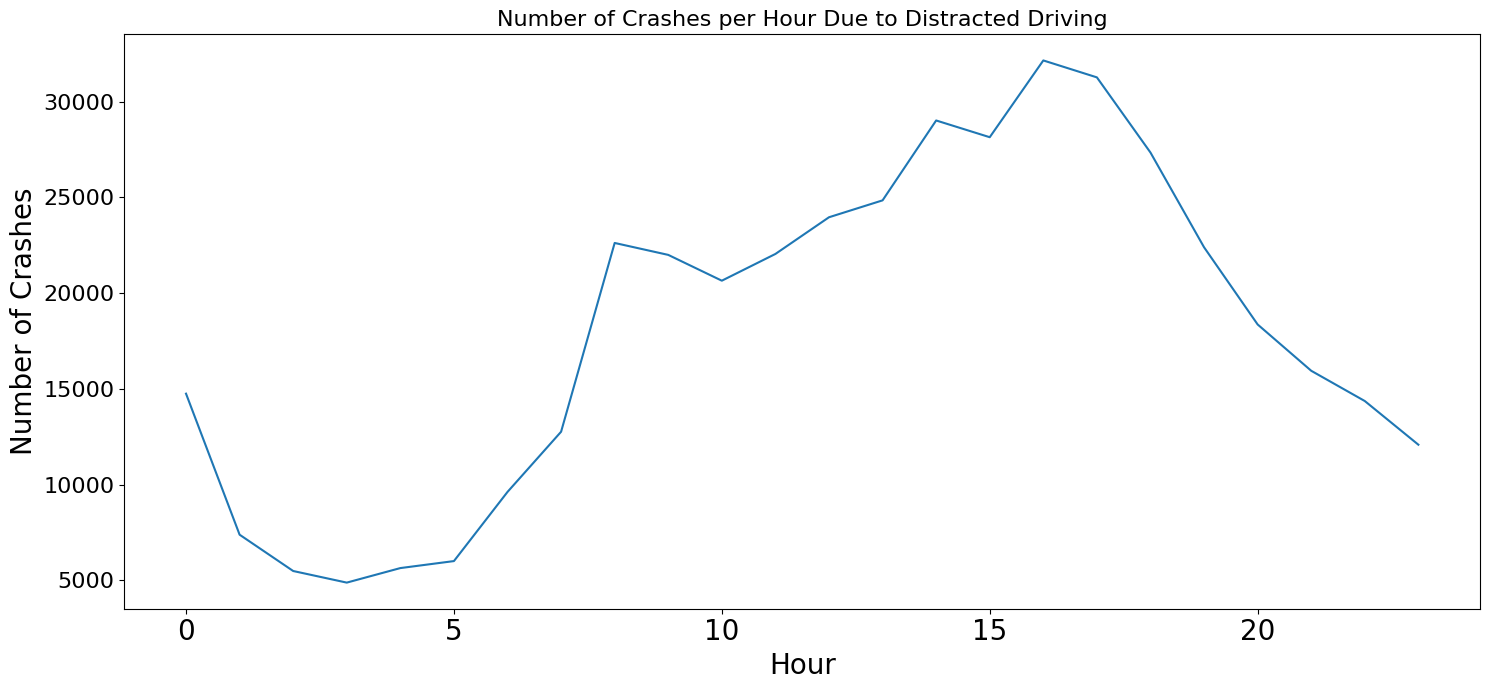

In [18]:
# Convert 'CRASH DATE' and 'CRASH TIME' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Filter out distracted driving
distracted_driving = data["CONTRIBUTING FACTOR VEHICLE 1"] == "Driver Inattention/Distraction"

# Group by hours to get the number of crashes due to distracted driving per hour
hourly_distracted = data[distracted_driving].groupby(data['CRASH TIME'].dt.hour).size()

plt.figure(figsize=(15, 7))
hourly_distracted.plot()
plt.title('Number of Crashes per Hour Due to Distracted Driving', fontsize=16)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Number of Crashes', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


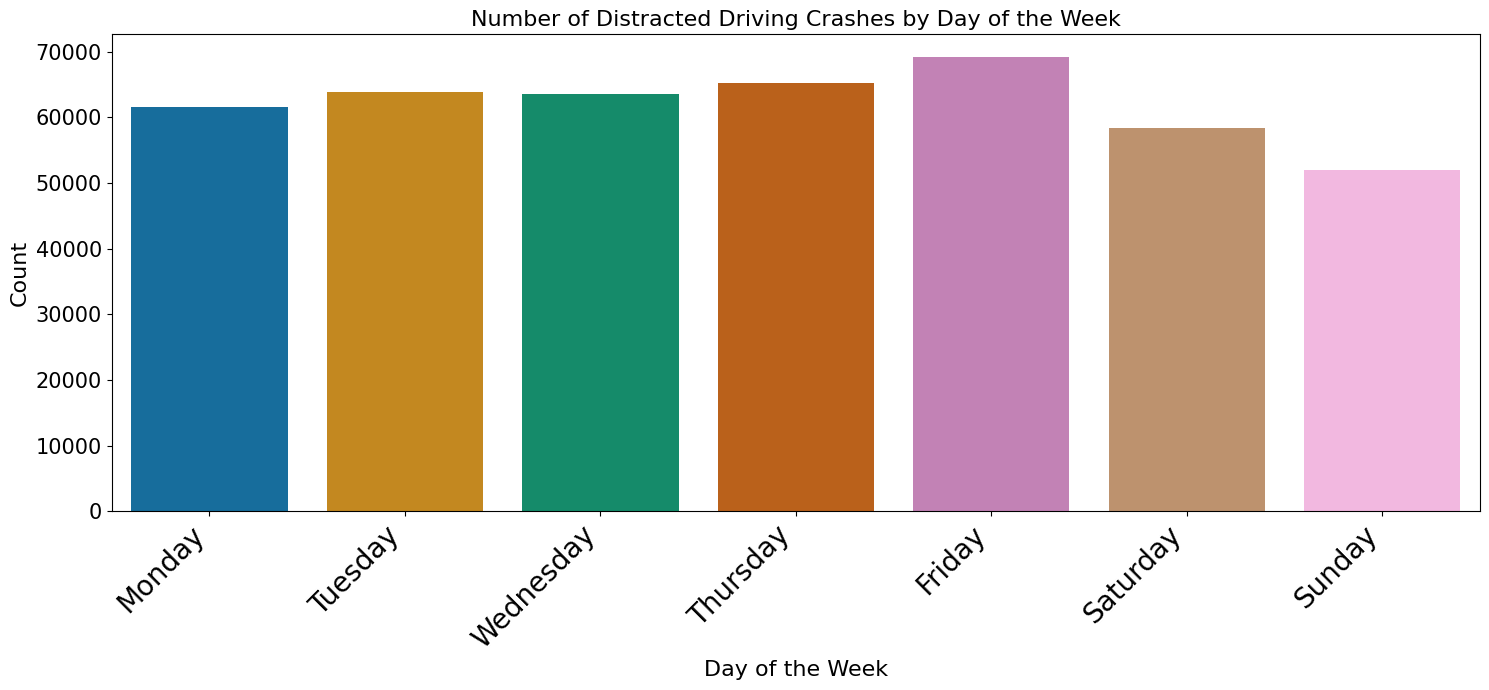

In [22]:
# Plot the number of distracted driving crashes by day of the week

# Group by days of week to get the number of crashes due to distracted driving per days of week
weekly_distracted = data[distracted_driving].groupby(data['CRASH DATE'].dt.dayofweek).size()

# Create weekday names
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 7))
sns.barplot(x= days_of_week, y=weekly_distracted.values, palette="colorblind", hue=days_of_week)
plt.title('Number of Distracted Driving Crashes by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


### **Top 3 Contributing Factors vs. Crash Severity**

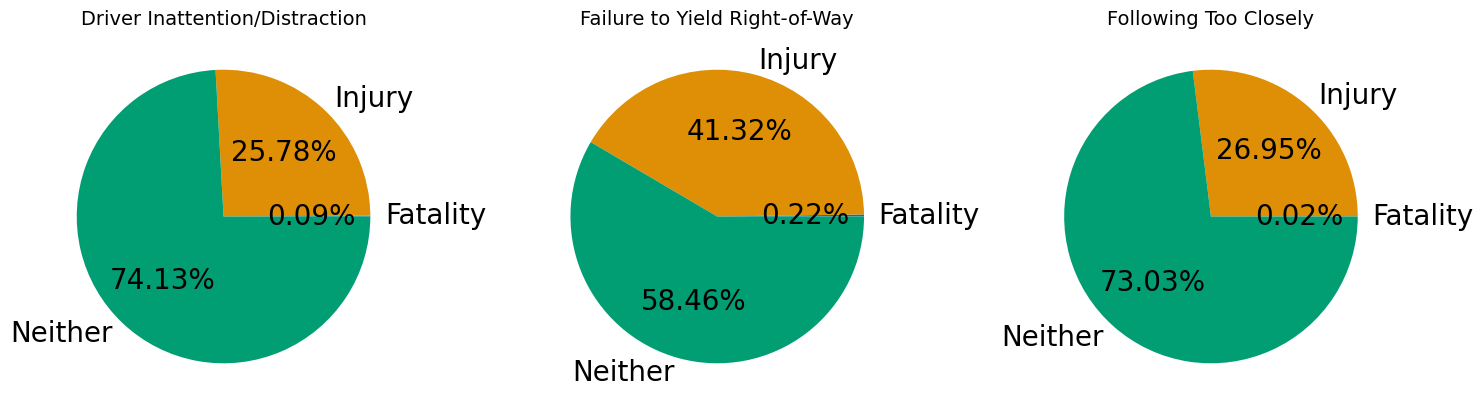

In [20]:
# Define a function to identify 'fatal', 'injury', and 'neither' categories
def determine_severity(row):
    if row['NUMBER OF PERSONS KILLED'] > 0:
        return 'Fatality'  # Killed
    elif row['NUMBER OF PERSONS INJURED'] > 0:
        return 'Injury'  # Injured
    else:
        return 'Neither'  # Neither injured nor killed

data['SEVERITY'] = data.apply(determine_severity, axis=1)

# Remove rows where the contributing factor is 'Unspecified'
data_filtered = data[data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Get the top 3 contributing factors by frequency
top_contributing_factors = data_filtered['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3).index

# Filter the data to include only the top 3 contributing factors
data_top_factors = data_filtered[data_filtered['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_contributing_factors)]

# Calculate how many accidents there are for each severity level for each top contributing factor
severity_counts = data_top_factors.groupby(['CONTRIBUTING FACTOR VEHICLE 1', 'SEVERITY']).size().unstack(fill_value=0)

# Create a subplot with 3 pie charts (one for each top contributing factor)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a row of 3 pie charts
axes = axes.flatten()  # Flatten axes to loop through them easily

# Loop through each contributing factor and create a pie chart for it
for i, factor in enumerate(severity_counts.index):
    ax = axes[i]  # Get the subplot for this factor
    severity_data = severity_counts.loc[factor]  # Get the counts of each severity level for this factor
    ax.pie(severity_data,  # Create a pie chart with the severity data
           labels=severity_data.index,  # Label the slices (severity levels)
           autopct='%1.2f%%',  # Show percentages on the slices
           colors=sns.color_palette("colorblind", 3),
           textprops={'fontsize': 20})  # Adjust label font size
    ax.set_title(f'{factor}', fontsize = 14)  # Set the title of the pie chart to the contributing factor name

plt.tight_layout()
plt.show()


---

## **Results**

1. **Top Contributing Factors:** Driver inattention/distraction, failure to yield right-of-way, and following too closely are the three most common contributing factors to crashes.

2. **Time Patterns:** Crashes due to inattentive/distracted driving peak in the afternoon (around 3–5 PM) and are least frequent in the evening and early morning.

3. **Day of the Week:** Friday has the highest frequency of inattentive/distracted driving crashes, while Sunday has the lowest. Crash frequency is fairly evenly spread across all days of the week, with an average of around 60,000 incidents.

4. **Crash Outcomes:** More than half of crashes result in neither injuries nor fatalities, yet more than 25% of crashes caused by the top three factors result in injuries. Failure to yield right-of-way leads to the most injuries, with 41.32% of these crashes causing injuries.

---
## **Discussion**

* The three most common contribution factors * suggest that human error and decision-making play a significant role in vehicle crashes.

* The peak in crashes caused by distracted driving between 3-5 PM aligns with typical afternoon rush hours, where higher traffic volumes and commuter fatigue might increase the likelihood of crashes.

* The higher frequency of crashes on Fridays may result from increased traffic volume at the end of the workweek, along with possible distractions related to weekend plans or fatigue from the workweek.

* Limitations include potential underrepresentation of less severe incidents due to reliance on police reports and the "Unspecified" category in contributing factors reducing analysis precision.

* Future research could explore the relationship between weather, road infrastructure, and contributing factors and investigate interventions for high-risk periods and behaviors.

---
## **Recommendations**

Automated enforcement tools like red-light and speed cameras can help control risky driving behaviors. Increasing traffic patrols and safety measures during peak crash hours in the afternoon can address rush-hour risks. Additionally, promoting in-vehicle technologies such as driver monitoring and collision avoidance systems can help reduce driver errors.

---
## **Acknowledgements**

Thank you to Emily Rothenberg, NEBDHub, NSDC, and the U.S. Department of Transportation Federal Highway Administration for their support and organization of this project.